# Histograma

## Objetivo: Entender o conceito e construção de um histograma, a partir de dados numéricos.

In [31]:
import pandas as pd

df = pd.read_csv('materiais de aula/survey_results_public.csv', index_col='ResponseId')
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('poster')

### Histograma

Gráfico que agrupa os valores em grupos ou "caçapas" (*bins*), e apresenta sua distribuição em cada grupo, como barras verticais.

- Dá uma ideia da cara da distribuição dos dados

Vamos plotar um histograma dos anos de experiência de trabalho (coluna `WorkExp`) com a função `sns.histplot()`:

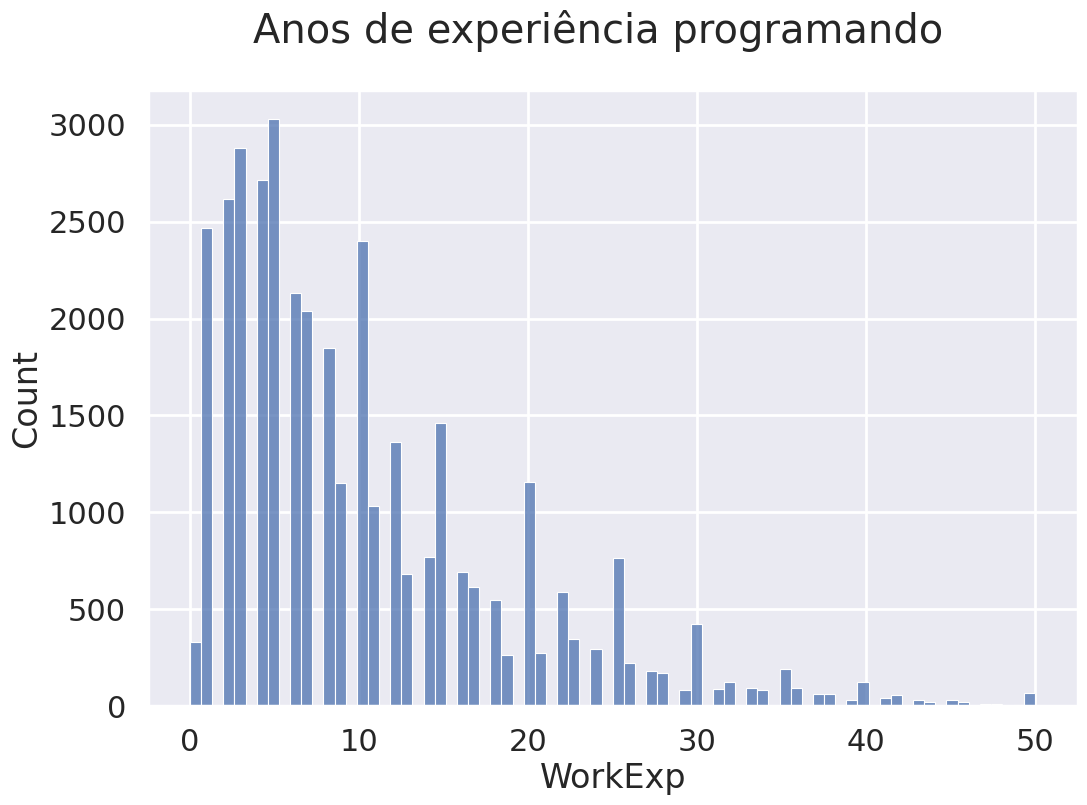

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, ax=ax, x='WorkExp')
fig.suptitle('Anos de experiência programando')

plt.show()

Como já havíamos visto com o boxplot, a maior incidência está nos *bins* de valor pequeno.

Em outras palavras, muitas pessoas que estão trabalhando há poucos anos, e poucas pessoas que trabalham a muitos anos!

### Tamanho e número de *bins*

Um detalhe importante é que não sabemos exatamente o ponto de corte de cada *bin*. Como não passamos nenhuma informação ao `sns.histplot()`, ele simplesmente calculou os pontos de corte da forma que achou mais conveniente para o gráfico.

Como sabemos que os valores correspondem a anos inteiros, podemos ser explícitos e determinar um tamanho máximo de *bin* de 1 ano. Assim, cada barra apresentará apenas os valores de um ano específico, sem misturá-los.

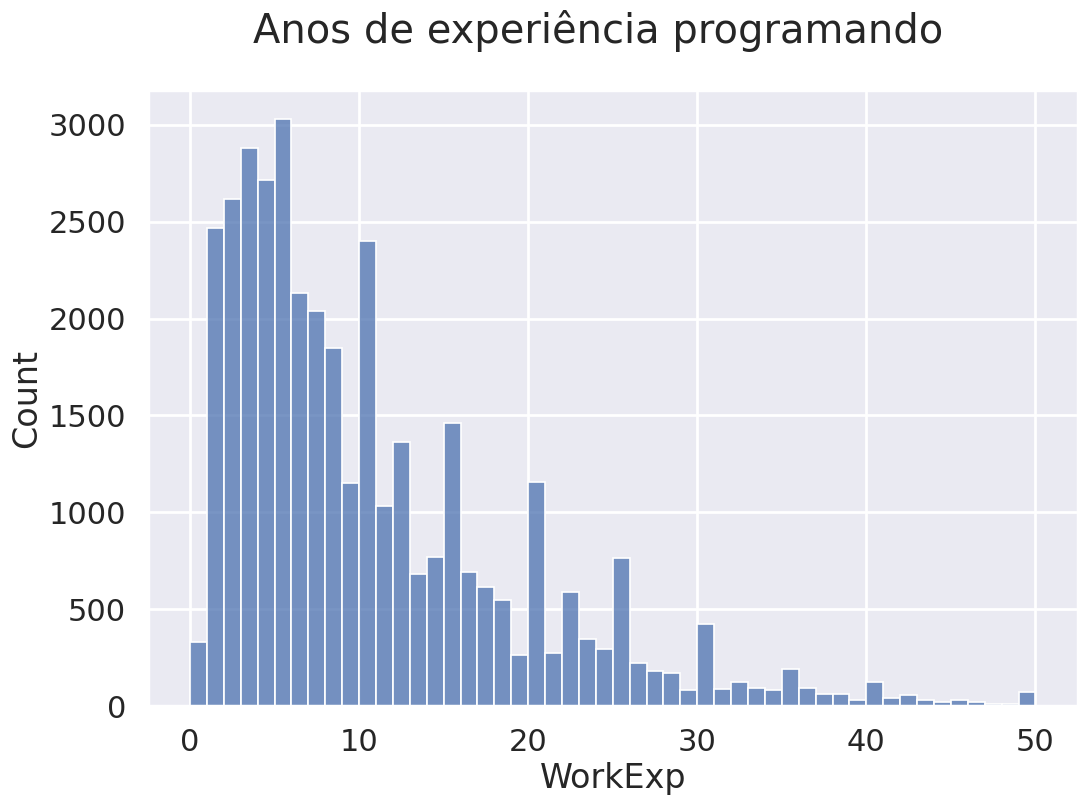

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', binwidth=1.0)
fig.suptitle('Anos de experiência programando')

plt.show()

Agora, o histograma ficou melhor preenchido, e sabemos que cada barra corresponde exatamente a um ano!

### Estimando a "curva" dos dados

Para complementar nosso histograma, podemos adicionar uma **estimativa de densidade por kernel**, ou KDE (do inglês *kernel density estimate*).

O KDE é uma forma de estimar a curvatura dos dados, mesmo que eles não sigam nenhuma distribuição específica (normal, exponencial, ...).

Aqui a representação gráfica do KDE do nosso histograma:

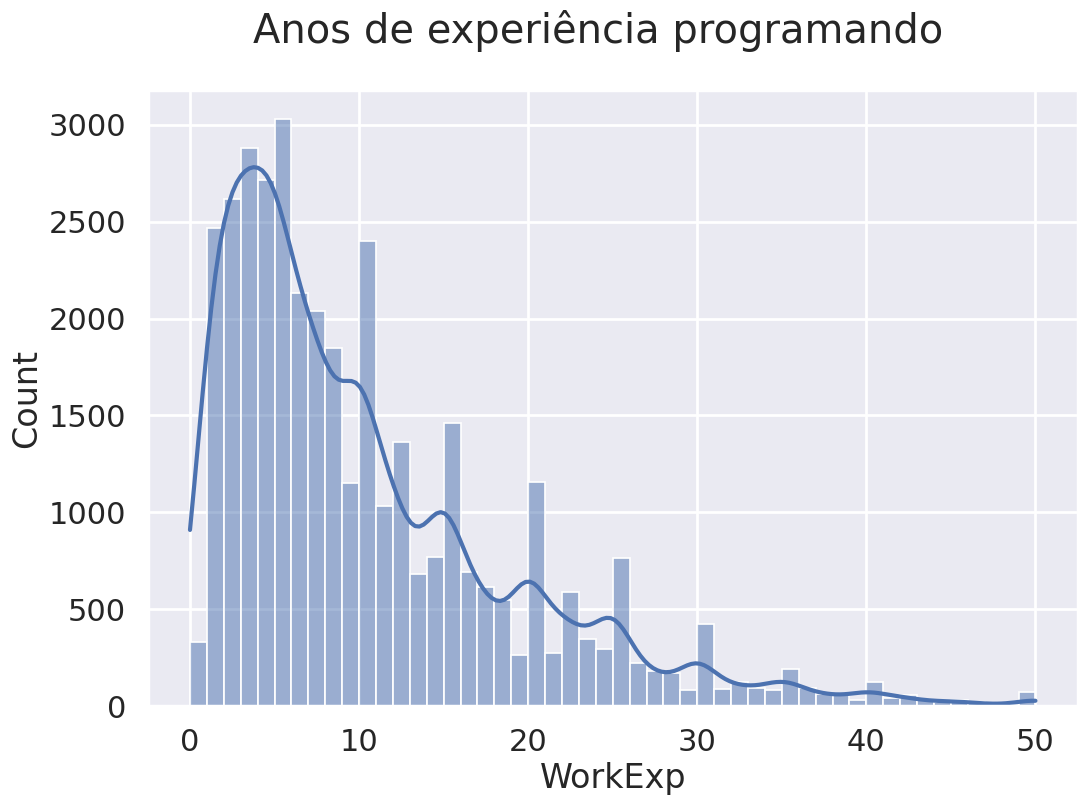

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', binwidth=1.0, kde=True)
fig.suptitle('Anos de experiência programando')

plt.show()

Como explicado anteriormente, o KDE não segue nenhuma função específica - apenas tenta replicar uma curva que represente os dados do histograma.

Se os dados realmente originarem de alguma função, então o KDE conseguirá recuperar este padrão. Por exemplo, se plotarmos um histograma a partir de valores aleatórios da curva normal:

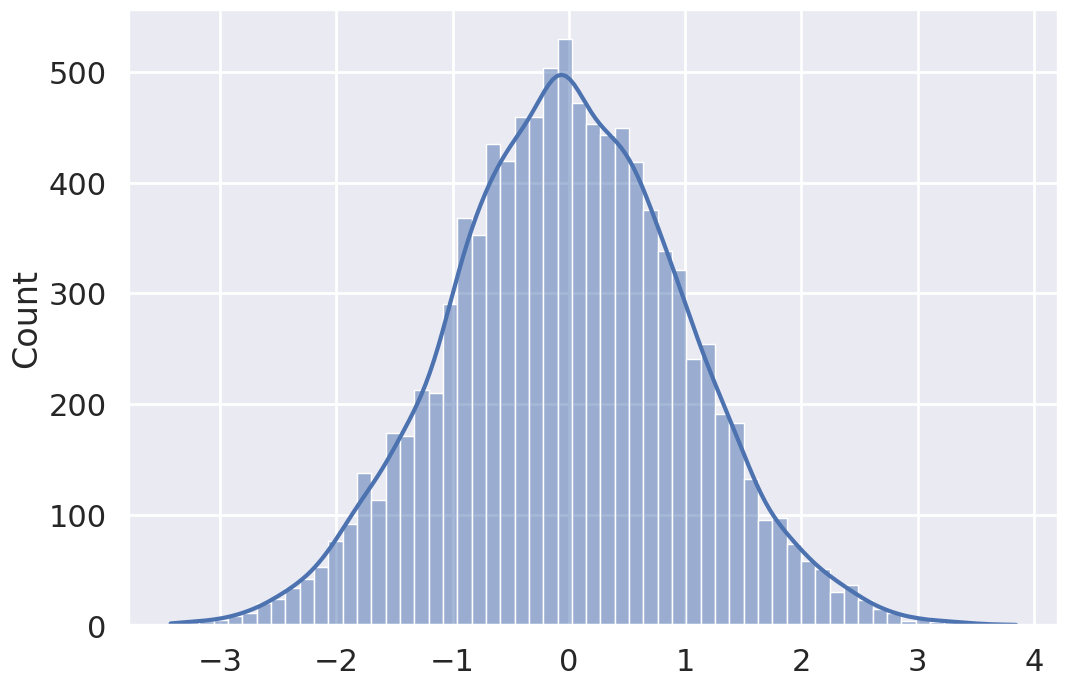

In [36]:
import numpy as np

valores = np.random.normal(size=10_000)

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(valores, kde=True)

plt.show()

### Insights
A visualização por KDE deixou claro que, apesar da tendência decrescente da curva, alguns anos parecem ter "picos", gerando uma espécie de ondulação. O que explicaria isso?

Vamos usar o método `value_counts()`, para contar a frequência de cada ano, e em seguida `sort_values()` para ordená-los:


In [37]:
df['WorkExp'].value_counts().sort_values(ascending=False)

WorkExp
5.0     3029
3.0     2880
4.0     2713
2.0     2619
1.0     2469
10.0    2398
6.0     2134
7.0     2038
8.0     1848
15.0    1461
12.0    1365
20.0    1154
9.0     1153
11.0    1034
14.0     770
25.0     762
16.0     691
13.0     681
17.0     615
22.0     590
18.0     549
30.0     423
23.0     347
0.0      332
24.0     292
21.0     273
19.0     264
26.0     224
35.0     190
27.0     182
28.0     171
32.0     126
40.0     121
33.0      94
36.0      91
31.0      85
29.0      81
34.0      81
50.0      66
38.0      64
37.0      61
42.0      58
41.0      40
43.0      31
45.0      30
39.0      28
44.0      19
46.0      19
47.0       9
48.0       9
49.0       5
Name: count, dtype: int64

Note que alguns dos valores mais frequentes são múltiplos de 5.

Na realidade, se voltarmos para o histograma, parece haver uma tendência de responder múltiplos de 5 (10, 15, 20, 25, ...). E também anos terminados com 2 (12, 22, 32, ...). Isso nos leva a um primeiro insight...

#### **As pessoas nem sempre se lembram exatamente há quantos anos estão trabalhando!**

Até poderíamos imaginar que os dados estão enviesados, e a pesquisa selecionou pessoas que trabalharam exatamente essas quantidades de anos. Mas isso parece pouco provável. A explicação mais plausível é que as pessoas se confundem, ou não se dão o trabalho de calcular a resposta exata. Então, no lugar de responder que estão há 13 ou 14 anos programando, é mais fácil "arredondar" e responder 15.

Este é um insight "bobinho", mas exemplifica o que queremos dizer, quando dizemos que EDA é uma etapa fundamental para:
- Entender seus dados
- Procurar e extrair insights

Afinal, não teríamos este insight apenas olhando pra mesma tabela no Excel ou pandas. Precisamos plotar e visualizar os dados de diferentes formas!